# <font color='green'>Import modules</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

sns.set_style('whitegrid')

%matplotlib inline

In [2]:
# Configure Pandas to show all columns
pd.set_option("display.max.columns", None)

# <font color='green'>Read Train datasets</font>

In [3]:
# read train and test datasets
train_set = pd.read_csv("../datasets/Output Data/train_Prepro.csv")

In [4]:
print(train_set.shape)

(2044, 200)


In [5]:
# Define features for model training
# train_set split to X,y train and X,y test
features = [n for n in train_set.columns if n not in ['id', 'pid','saleprice']]
X = train_set[features]
y = train_set['saleprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# <font color='green'>Benchmark Linear Regression without feature standardization</font>

In [6]:
# Cross validation on X_train
linr = LinearRegression()

cv_score = cross_val_score(linr, X_train, y_train, cv=6)
print(f"min cv score: {round(cv_score.min(),3)}")
print(f"max cv score: {round(cv_score.max(),3)}")
print(f"mean cv score: {round(cv_score.mean(),3)}")
print(f"Range cv scores: {round(cv_score.max() - cv_score.min(),3)}")

min cv score: 0.886
max cv score: 0.931
mean cv score: 0.907
Range cv scores: 0.044


In [7]:
# Retrain on X_train and compare with X_test
linr_model = linr.fit(X_train, y_train);

train_score = linr_model.score(X_train, y_train)
test_score = linr_model.score(X_test, y_test)

print(f"Train r-sqrt: {round(train_score,3)}")
print(f"Test r-sqrt: {round(test_score,3)}")
print(f"r-sqrt difference: {round((train_score - test_score), 4)}")

Train r-sqrt: 0.933
Test r-sqrt: 0.404
r-sqrt difference: 0.5291


In [8]:
# Predict on full train set
linr_prediction = linr_model.predict(X)
linr_residuals = y - linr_prediction

full_train_score = linr_model.score(X, y)
full_train_mse = mean_squared_error(y, linr_prediction)
full_train_rmse = np.sqrt(full_train_mse)

print(f"Full Train set r-sqrt: {round(full_train_score,3)}")
print(f"Full Train set mse: {round(full_train_mse)}")
print(f"Full Train set rmse: {round(full_train_rmse)}")

Full Train set r-sqrt: 0.867
Full Train set mse: 837615021.0
Full Train set rmse: 28942.0


Text(0.5, 1.0, 'Model Prediction vs Actual Sale Price')

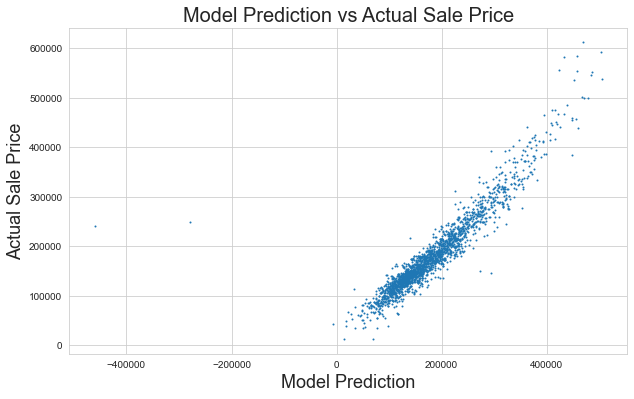

In [9]:
plt.figure(figsize=(10,6))

plt.scatter(linr_prediction, y, s=1);

plt.xlabel("Model Prediction", fontsize=18)
plt.ylabel("Actual Sale Price", fontsize=18)
plt.title("Model Prediction vs Actual Sale Price", fontsize=20)

Text(0.5, 1.0, 'Residuals Histogram')

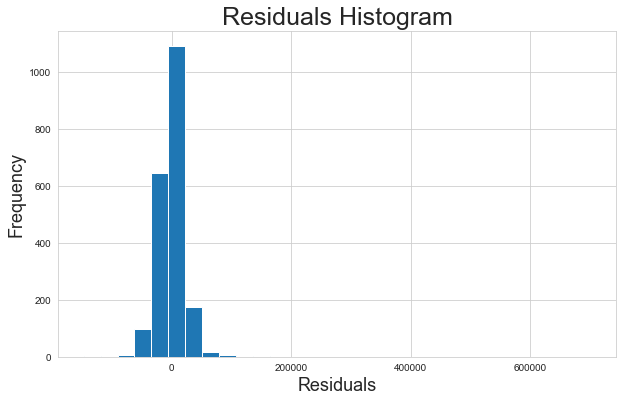

In [10]:
plt.figure(figsize=(10,6))

plt.hist(linr_residuals, bins=30);

plt.xlabel("Residuals", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.title("Residuals Histogram", fontsize=25)

# <font color='green'>Benchmark Linear Regression with feature standardization</font>

In [7]:
ss = StandardScaler()
ss.fit(X_train)

X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)
X_ss = ss.transform(X)

In [12]:
# Cross validation on X_train_ss
cv_score = cross_val_score(linr, X_train_ss, y_train, cv=6)
print(f"min cv score: {round(cv_score.min(),3)}")
print(f"max cv score: {round(cv_score.max(),3)}")
print(f"mean cv score: {round(cv_score.mean(),3)}")
print(f"Range cv scores: {round(cv_score.max() - cv_score.min(),3)}")

min cv score: -4.749089373184147e+23
max cv score: 0.912
mean cv score: -7.94521699235548e+22
Range cv scores: 4.749089373184147e+23


In [13]:
# Retrain on X_train and compare with X_test
linr_ss_model = linr.fit(X_train_ss, y_train);

train_score = linr_ss_model.score(X_train_ss, y_train)
test_score = linr_ss_model.score(X_test_ss, y_test)

print(f"Train r-sqrt: {round(train_score,3)}")
print(f"Test r-sqrt: {round(test_score,3)}")
print(f"r-sqrt difference: {round(train_score - test_score,3)}")

Train r-sqrt: 0.933
Test r-sqrt: -1.4543307431857555e+19
r-sqrt difference: 1.4543307431857555e+19


In [14]:
# Predicrt for full X_ss set
linr_ss_prediction = linr_ss_model.predict(X_ss)
linr_ss_residuals = y - linr_ss_prediction

full_train_score = linr_ss_model.score(X_ss, y)
full_train_mse = mean_squared_error(y, linr_ss_prediction)
full_train_rmse = np.sqrt(full_train_mse)

print(f"Full Train set r-sqrt: {round(full_train_score,3)}")
print(f"Full Train set mse: {round(full_train_mse)}")
print(f"Full Train set rmse: {round(full_train_mse)}")

Full Train set r-sqrt: -1.8310369071439644e+18
Full Train set mse: 1.1511324104976276e+28
Full Train set rmse: 1.1511324104976276e+28


Text(0.5, 1.0, 'Model Prediction vs Actual Sale Price')

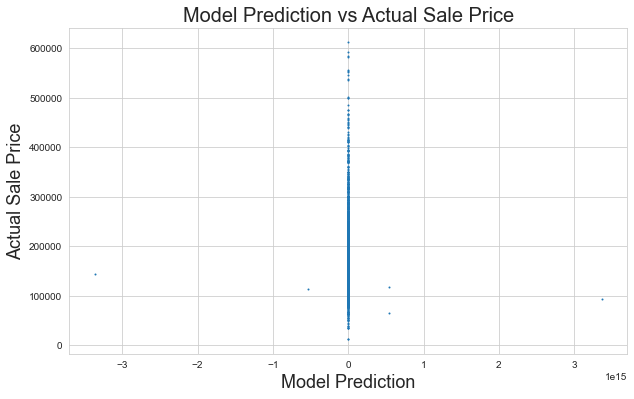

In [15]:
plt.figure(figsize=(10,6))

plt.scatter(linr_ss_prediction, y, s=1);

plt.xlabel("Model Prediction", fontsize=18)
plt.ylabel("Actual Sale Price", fontsize=18)
plt.title("Model Prediction vs Actual Sale Price", fontsize=20)

Text(0.5, 1.0, 'Residuals Histogram')

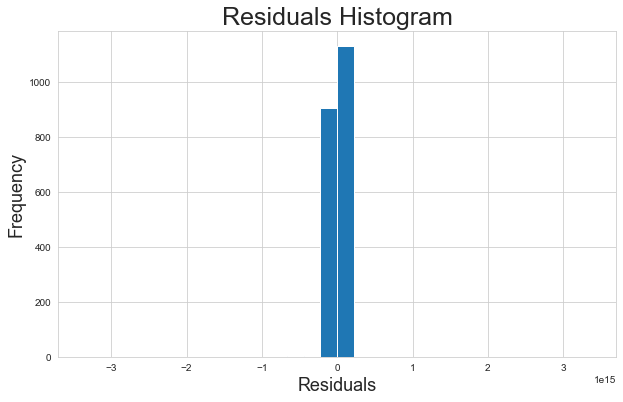

In [16]:
plt.figure(figsize=(10,6))

plt.hist(linr_ss_residuals, bins=30);

plt.xlabel("Residuals", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.title("Residuals Histogram", fontsize=25)

# <font color='green'>Ridge Regularization Benchmark</font>

In [12]:
ridge = RidgeCV(alphas=np.logspace(0, 10, 200))

In [13]:
ridge_scores = cross_val_score(ridge, X_train_ss, y_train, cv=6)
print(f"ridge cv r-sqrt max: {round(ridge_scores.max(), 3)}")
print(f"ridge cv r-sqrt min {round(ridge_scores.min(), 3)}")
print(f"ridge cv r-sqrt mean: {round(ridge_scores.mean(), 3)}")
print(f"Range cv scores: {round(ridge_scores.max() - ridge_scores.min(),3)}")

ridge cv r-sqrt max: 0.937
ridge cv r-sqrt min 0.887
ridge cv r-sqrt mean: 0.91
Range cv scores: 0.05


In [16]:
ridge_model = ridge.fit(X_train_ss, y_train)
ridge_train_score = ridge_model.score(X_train_ss, y_train)
ridge_test_score = ridge_model.score(X_test_ss, y_test)

print(f"ridge train r-sqrt: {round(ridge_train_score, 3)}")
print(f"ridge test r-sqrt: {round(ridge_test_score, 3)}")
print(f"r-sqrt difference: {round((ridge_train_score - ridge_test_score), 4)}")

ridge train r-sqrt: 0.929
ridge test r-sqrt: 0.902
r-sqrt difference: 0.0268


In [15]:
ridge_prediction = ridge_model.predict(X_ss)
ridge_residuals = y - ridge_prediction

full_train_score = ridge_model.score(X_ss, y)
full_train_mse = mean_squared_error(y, ridge_prediction)
full_train_rmse = np.sqrt(full_train_mse)

print(f"Full Train set ridge r-sqrt: {round(full_train_score,3)}")
print(f"Full Train set ridge mse: {round(full_train_mse)}")
print(f"Full Train set ridge rmse: {round(full_train_rmse)}")
print(f"Full Train set ridge optimal alpha: {round(ridge_model.alpha_,0)}")

Full Train set ridge r-sqrt: 0.925
Full Train set ridge mse: 473856181.0
Full Train set ridge rmse: 21768.0
Full Train set ridge optimal alpha: 129.0


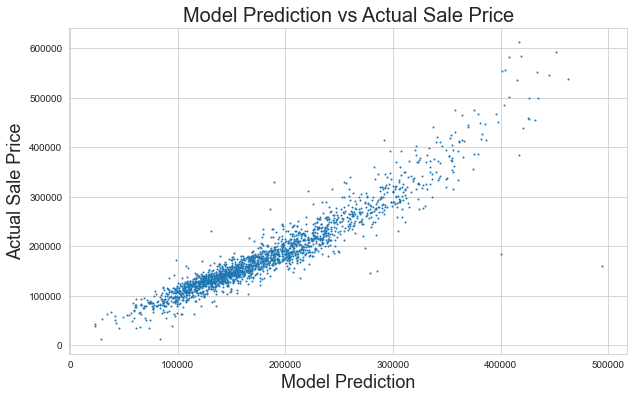

In [23]:
plt.figure(figsize=(10,6))

plt.scatter(ridge_prediction, y, s=1);

plt.xlabel("Model Prediction", fontsize=18)
plt.ylabel("Actual Sale Price", fontsize=18)
plt.title("Model Prediction vs Actual Sale Price", fontsize=20);

Text(0.5, 1.0, 'Residuals Histogram')

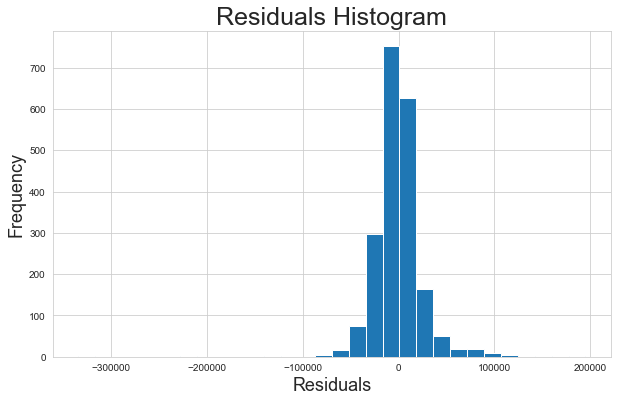

In [24]:
plt.figure(figsize=(10,6))

plt.hist(ridge_residuals, bins=30);

plt.xlabel("Residuals", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.title("Residuals Histogram", fontsize=25)

# <font color='green'>Lasso Regularization Benchmark</font>

In [25]:
lasso = LassoCV(n_alphas=500)

In [26]:
lasso_scores = cross_val_score(lasso, X_train_ss, y_train, cv=6)
print(f"lasso cv r-sqrt max: {round(lasso_scores.max(), 3)}")
print(f"lasso cv r-sqrt min {round(lasso_scores.min(), 3)}")
print(f"lasso cv r-sqrt mean: {round(lasso_scores.mean(), 3)}")
print(f"Range cv scores: {round(lasso_scores.max() - lasso_scores.min(),3)}")

lasso cv r-sqrt max: 0.918
lasso cv r-sqrt min 0.692
lasso cv r-sqrt mean: 0.842
Range cv scores: 0.226


In [27]:
lasso_model = lasso.fit(X_train_ss, y_train)
lasso_train_score = lasso_model.score(X_train_ss, y_train)
lasso_test_score = lasso_model.score(X_test_ss, y_test)

print(f"lasso train r-sqrt: {round(lasso_train_score, 3)}")
print(f"lasso test r-sqrt: {round(lasso_test_score, 3)}")
print(f"r-sqrt difference: {round((lasso_train_score - lasso_test_score), 4)}")

lasso train r-sqrt: 0.906
lasso test r-sqrt: 0.87
r-sqrt difference: 0.0359


In [28]:
lasso_prediction = lasso_model.predict(X_ss)
lasso_residuals = y - lasso_prediction

full_train_score = lasso_model.score(X_ss, y)
full_train_mse = mean_squared_error(y, lasso_prediction)
full_train_rmse = np.sqrt(full_train_mse)

print(f"Full Train set lasso r-sqrt: {round(full_train_score,3)}")
print(f"Full Train set lasso mse: {round(full_train_mse)}")
print(f"Full Train set lasso rmse: {round(full_train_rmse)}")
print(f"Full Train set lasso optimal alpha: {round(lasso_model.alpha_,0)}")

Full Train set lasso r-sqrt: 0.902
Full Train set lasso mse: 617757739.0
Full Train set lasso rmse: 24855.0
Full Train set lasso optimal alpha: 570.0


Text(0.5, 1.0, 'Model Prediction vs Actual Sale Price')

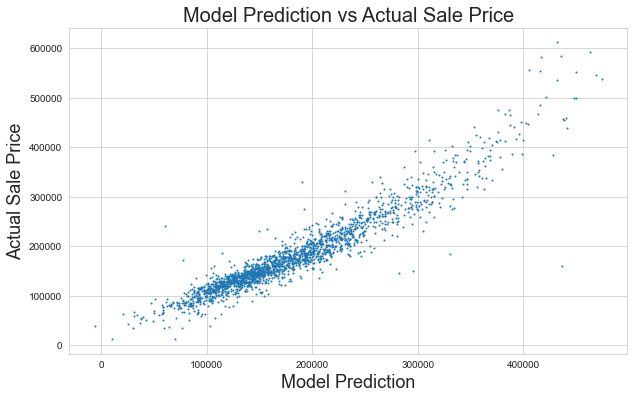

In [29]:
plt.figure(figsize=(10,6))

plt.scatter(lasso_prediction, y, s=1);

plt.xlabel("Model Prediction", fontsize=18)
plt.ylabel("Actual Sale Price", fontsize=18)
plt.title("Model Prediction vs Actual Sale Price", fontsize=20)

Text(0.5, 1.0, 'Residuals Histogram')

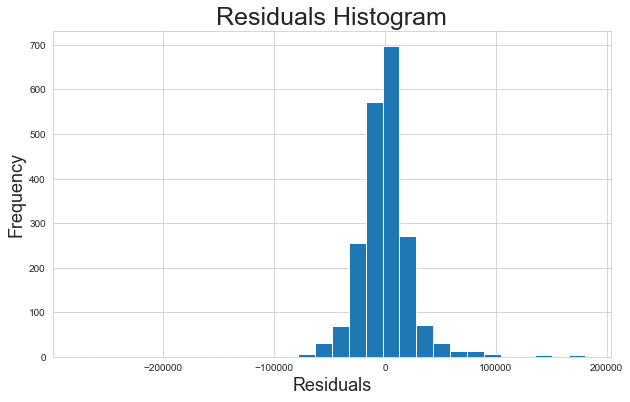

In [30]:
plt.figure(figsize=(10,6))

plt.hist(lasso_residuals, bins=30);

plt.xlabel("Residuals", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.title("Residuals Histogram", fontsize=25)

# <font color='green'>Elastic Net Regularization Benchmark</font>

In [31]:
enet = ElasticNetCV(l1_ratio=np.linspace(0.01, 1, 50), n_alphas = 100)

In [32]:
enet_scores = cross_val_score(enet, X_train_ss, y_train, cv=6)
print(f"enet cv r-sqrt max: {round(enet_scores.max(), 3)}")
print(f"enet cv r-sqrt min {round(enet_scores.min(), 3)}")
print(f"enet cv r-sqrt mean: {round(enet_scores.mean(), 3)}")
print(f"Range cv scores: {round(enet_scores.max() - enet_scores.min(),3)}")

/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 867036276.9924316, tolerance: 772449801.3020619
  tol, rng, random, positive)
/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1138023020.0222168, tolerance: 772449801.3020619
  tol, rng, random, positive)
/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1131358113.7039795, tolerance: 772449801.3020619
  tol, rng, random, positive)
/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: Co

enet cv r-sqrt max: 0.907
enet cv r-sqrt min 0.693
enet cv r-sqrt mean: 0.831
Range cv scores: 0.214


In [33]:
enet_model = enet.fit(X_train_ss, y_train)
enet_train_score = enet_model.score(X_train_ss, y_train)
enet_test_score = enet_model.score(X_test_ss, y_test)

print(f"enet train r-sqrt: {round(enet_train_score, 3)}")
print(f"enet test r-sqrt: {round(enet_test_score, 3)}")
print(f"r-sqrt difference: {round((enet_train_score - enet_test_score), 4)}")

/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1111767880.5638428, tolerance: 909447360.2525864
  tol, rng, random, positive)
/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1101925675.6293945, tolerance: 909447360.2525864
  tol, rng, random, positive)
/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1037282951.0905762, tolerance: 909447360.2525864
  tol, rng, random, positive)
/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: C

enet train r-sqrt: 0.907
enet test r-sqrt: 0.868
r-sqrt difference: 0.0387


In [34]:
enet_prediction = enet_model.predict(X_ss)
enet_residuals = y - enet_prediction

full_train_score = enet_model.score(X_ss, y)
full_train_mse = mean_squared_error(y, enet_prediction)
full_train_rmse = np.sqrt(full_train_mse)

print(f"Full Train set enet r-sqrt: {round(full_train_score,3)}")
print(f"Full Train set enet mse: {round(full_train_mse)}")
print(f"Full Train set enet rmse: {round(full_train_mse)}")
print(f"Full Train set enet optimal alpha: {round(enet_model.alpha_,0)}")
print(f"Full Train set enet optimal l1: {round(enet_model.l1_ratio_,0)}")

Full Train set enet r-sqrt: 0.902
Full Train set enet mse: 615586051.0
Full Train set enet rmse: 615586051.0
Full Train set enet optimal alpha: 557.0
Full Train set enet optimal l1: 1.0


Text(0.5, 1.0, 'Model Prediction vs Actual Sale Price')

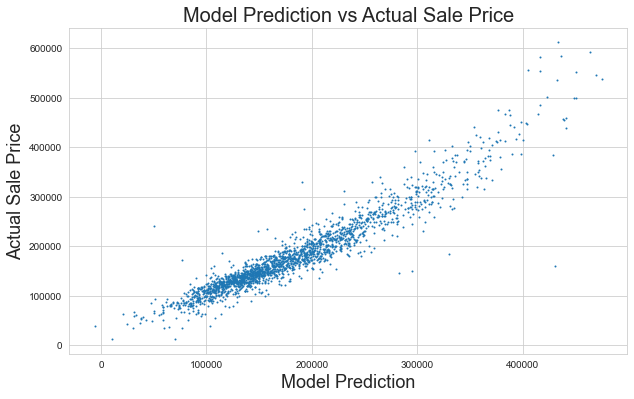

In [35]:
plt.figure(figsize=(10,6))

plt.scatter(enet_prediction, y, s=1);

plt.xlabel("Model Prediction", fontsize=18)
plt.ylabel("Actual Sale Price", fontsize=18)
plt.title("Model Prediction vs Actual Sale Price", fontsize=20)

Text(0.5, 1.0, 'Residuals Histogram')

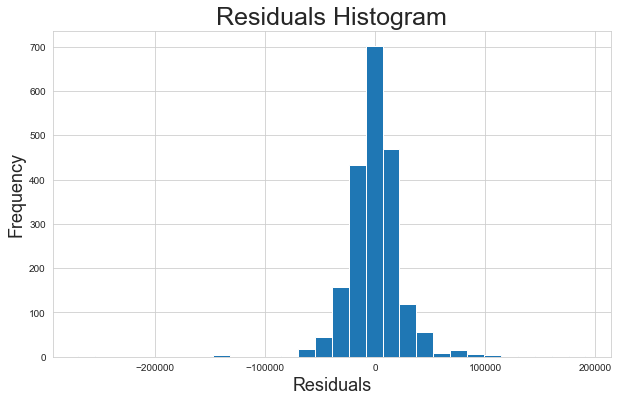

In [36]:
plt.figure(figsize=(10,6))

plt.hist(enet_residuals, bins=30);

plt.xlabel("Residuals", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.title("Residuals Histogram", fontsize=25)

# <font color='green'>Comparing Results</font>

|Model  |CV Score Range|Train-Test Split score diff|Full Train R2|Full train RMSE|
|-|-|-|-|-|
|LR w/o SS|0.289|0.015|0.913|23,332|
|LR with SS|BAD|0.014|0.913|BAD|
|Ridge Regularization|0.103|0.005|0.893|25,959|
|Lasso Regularization|0.113|0.008|0.895|25,639|
|Enet Regularization|0.128|0.009|0.863|BAD|

<font color='green'>Regression without regularizations show better R2 and in the case of LR w/o SS also show a better RMSE score. However without SS and higher R2 score difference in CV and train-test-splits, it is highly likely overfitted.<br>
    <br>
We will select Ridge Regularization for further model optimization</font>